In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings("ignore")

In [2]:
import yfinance as yf

In [3]:
stock_symbol = 'AAPL'  # Replace with the stock symbol you're interested in
stock = yf.Ticker(stock_symbol)
df = stock.history(period='5y')

In [4]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-11-07 00:00:00-05:00,49.316103,50.295385,48.875546,50.269047,133697600,0.0000,0.0
2018-11-08 00:00:00-05:00,50.451645,50.485283,49.675578,50.093647,101450400,0.1825,0.0
2018-11-09 00:00:00-05:00,49.387264,49.497786,48.594376,49.127773,137463200,0.0000,0.0
2018-11-12 00:00:00-05:00,47.813491,48.017721,46.561689,46.652992,204542000,0.0000,0.0
2018-11-13 00:00:00-05:00,46.042723,47.376212,45.999473,46.186882,187531600,0.0000,0.0


In [5]:
df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [6]:
new_df = df["Close"]

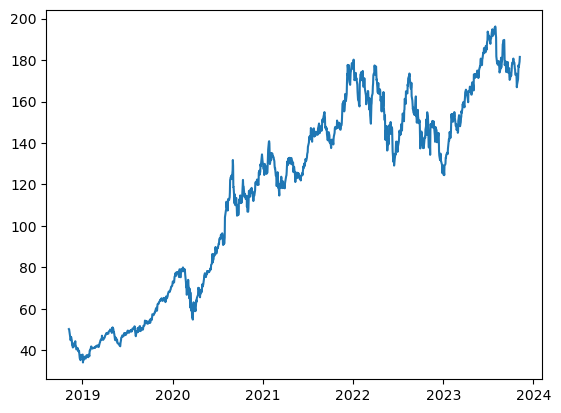

In [7]:
plt.plot(new_df)

In [8]:
new_df = pd.DataFrame(new_df,columns=["Close"])
new_df

,Close
Date,
2018-11-07 00:00:00-05:00,50.269047
2018-11-08 00:00:00-05:00,50.093647
2018-11-09 00:00:00-05:00,49.127773
2018-11-12 00:00:00-05:00,46.652992
2018-11-13 00:00:00-05:00,46.186882
...,...
2023-11-01 00:00:00-04:00,173.970001
2023-11-02 00:00:00-04:00,177.570007
2023-11-03 00:00:00-04:00,176.649994


In [9]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(new_df["Close"],autolag='AIC')
print("ADF: ", dftest[0])
print("P-Value: ", dftest[1])
print("Num Of Lags: ", dftest[2])
print("Num of observation used for ADF Regression and Critical Values Calculation: ", dftest[3])
print("Critical Value")
for key,val in dftest[4].items():
    print("\t",key,": ",val)

ADF:  -0.9395549559060885
P-Value:  0.7746675647866863
Num Of Lags:  0
Num of observation used for ADF Regression and Critical Values Calculation:  1257
Critical Value
	 1% :  -3.4355629707955395
	 5% :  -2.863842063387667
	 10% :  -2.567995644141416


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
length = new_df.size
percent_data = 0.98

In [12]:
from math import ceil
train = new_df[:ceil(length*percent_data)]
test = new_df[ceil(length*percent_data)-16:]

In [13]:
train.size

1233

In [14]:
train

,Close
Date,
2018-11-07 00:00:00-05:00,50.269047
2018-11-08 00:00:00-05:00,50.093647
2018-11-09 00:00:00-05:00,49.127773
2018-11-12 00:00:00-05:00,46.652992
2018-11-13 00:00:00-05:00,46.186882
...,...
2023-09-27 00:00:00-04:00,170.429993
2023-09-28 00:00:00-04:00,170.690002
2023-09-29 00:00:00-04:00,171.210007


In [15]:
scaler.fit(train)

MinMaxScaler()

In [16]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [17]:
scaled_train

array([[0.09940188],
       [0.09831931],
       [0.09235791],
       ...,
       [0.84585313],
       [0.86153005],
       [0.85319777]])

In [18]:
from keras.src.preprocessing.sequence import TimeseriesGenerator
generator = TimeseriesGenerator(scaled_train,scaled_train,length=16,batch_size=32)

In [19]:
generator[0]

(array([[[0.09940188],
         [0.09831931],
         [0.09235791],
         [0.07708349],
         [0.07420664],
         [0.06615421],
         [0.07299064],
         [0.07613446],
         [0.06476022],
         [0.05159168],
         [0.05129509],
         [0.04463663],
         [0.04809192],
         [0.0475284 ],
         [0.05746418],
         [0.05540284]],
 
        [[0.09831931],
         [0.09235791],
         [0.07708349],
         [0.07420664],
         [0.06615421],
         [0.07299064],
         [0.07613446],
         [0.06476022],
         [0.05159168],
         [0.05129509],
         [0.04463663],
         [0.04809192],
         [0.0475284 ],
         [0.05746418],
         [0.05540284],
         [0.05396441]],
 
        [[0.09235791],
         [0.07708349],
         [0.07420664],
         [0.06615421],
         [0.07299064],
         [0.07613446],
         [0.06476022],
         [0.05159168],
         [0.05129509],
         [0.04463663],
         [0.04809192],
     

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [43]:
model = Sequential()
model.add(LSTM(64,activation='tanh',input_shape = (16,1), return_sequences=True))
model.add(LSTM(32,activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(16,activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='adam',loss = 'mse', metrics=["accuracy"])

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 16, 64)            16896     
                                                                 
 lstm_8 (LSTM)               (None, 16, 32)            12416     
                                                                 
 dropout_1 (Dropout)         (None, 16, 32)            0         
                                                                 
 lstm_9 (LSTM)               (None, 16)                3136      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 32465 (126.82 KB)
Trainable params: 32465 (126.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.fit(generator,epochs=20,shuffle=False)

Epoch 1/20
39/39 [==============================] - 20s 29ms/step - loss: 0.0044 - accuracy: 0.0016
Epoch 2/20
39/39 [==============================] - 1s 28ms/step - loss: 0.0215 - accuracy: 0.0016
Epoch 3/20
39/39 [==============================] - 1s 28ms/step - loss: 0.0058 - accuracy: 0.0016
Epoch 4/20
39/39 [==============================] - 1s 30ms/step - loss: 0.0100 - accuracy: 0.0016
Epoch 5/20
39/39 [==============================] - 1s 28ms/step - loss: 0.0089 - accuracy: 0.0016
Epoch 6/20
39/39 [==============================] - 1s 28ms/step - loss: 0.0027 - accuracy: 0.0016
Epoch 7/20
39/39 [==============================] - 1s 28ms/step - loss: 0.0043 - accuracy: 0.0016
Epoch 8/20
39/39 [==============================] - 1s 28ms/step - loss: 0.0041 - accuracy: 0.0016
Epoch 9/20
39/39 [==============================] - 1s 28ms/step - loss: 0.0035 - accuracy: 0.0016
Epoch 10/20
39/39 [==============================] - 1s 30ms/step - loss: 0.0031 - accuracy: 0.0016
Epoch 11

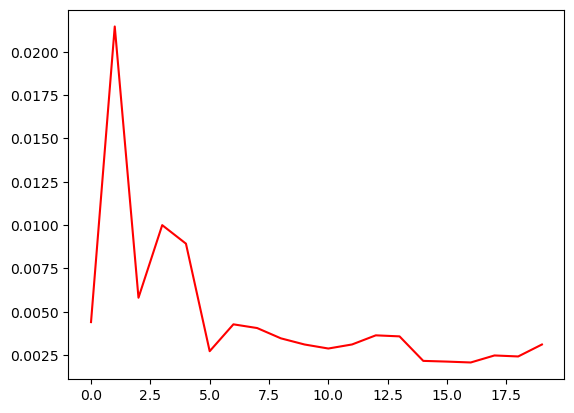

In [46]:
plt.plot(model.history.history['loss'],color='red',label='train')

In [61]:
val_loss = model.history.history['val_loss'][-1]

KeyError: 'val_loss'

In [47]:
generator_test = TimeseriesGenerator(scaled_test,scaled_test,length=16, batch_size=32)

In [48]:
test_data = []
for i,j in generator_test:
    test_data.append(i)

In [49]:
test_data

[array([[[0.87726874],
         [0.86436922],
         [0.87381242],
         [0.86930677],
         [0.88757602],
         [0.89436529],
         [0.87226941],
         [0.86264097],
         [0.86794892],
         [0.87591089],
         [0.85048216],
         [0.84103886],
         [0.84264365],
         [0.84585313],
         [0.86153005],
         [0.85319777]],
 
        [[0.86436922],
         [0.87381242],
         [0.86930677],
         [0.88757602],
         [0.89436529],
         [0.87226941],
         [0.86264097],
         [0.86794892],
         [0.87591089],
         [0.85048216],
         [0.84103886],
         [0.84264365],
         [0.84585313],
         [0.86153005],
         [0.85319777],
         [0.86097459]],
 
        [[0.87381242],
         [0.86930677],
         [0.88757602],
         [0.89436529],
         [0.87226941],
         [0.86264097],
         [0.86794892],
         [0.87591089],
         [0.85048216],
         [0.84103886],
         [0.84264365],
     

In [50]:
y_pred = model.predict(test_data)

1/1 [==============================] - 4s 4s/step


In [51]:
y_pred

array([[0.91505796],
       [0.9134961 ],
       [0.91261566],
       [0.91233426],
       [0.91301817],
       [0.9141522 ],
       [0.9159127 ],
       [0.9186292 ],
       [0.9216432 ],
       [0.9244803 ],
       [0.9268206 ],
       [0.9289182 ],
       [0.93039995],
       [0.93088746],
       [0.9304766 ],
       [0.9292361 ],
       [0.92750174],
       [0.9247254 ],
       [0.92119056],
       [0.91726476],
       [0.9134001 ],
       [0.91031617],
       [0.9083337 ],
       [0.9074506 ],
       [0.90802824]], dtype=float32)

In [52]:
y_real = scaled_test[16:]

In [53]:
model.evaluate(y_pred,y_real)

1/1 [==============================] - 4s 4s/step - loss: 0.6432 - accuracy: 0.0000e+00


[0.6431569457054138, 0.0]

In [32]:
y_pred = scaler.inverse_transform(y_pred)
y_real = scaler.inverse_transform(scaled_test[16:])

In [33]:
y_pred

array([[172.15019],
       [172.30453],
       [172.74461],
       [173.65672],
       [174.87415],
       [176.02922],
       [177.20633],
       [178.31851],
       [178.97972],
       [179.32881],
       [179.24393],
       [178.71986],
       [177.99094],
       [176.88728],
       [175.76938],
       [174.86102],
       [173.8184 ],
       [172.29897],
       [170.9724 ],
       [170.2082 ],
       [169.88063],
       [170.27237],
       [171.49716],
       [172.85318],
       [174.4786 ]], dtype=float32)

In [34]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_real, y_pred)
mae

3.6758526611328137

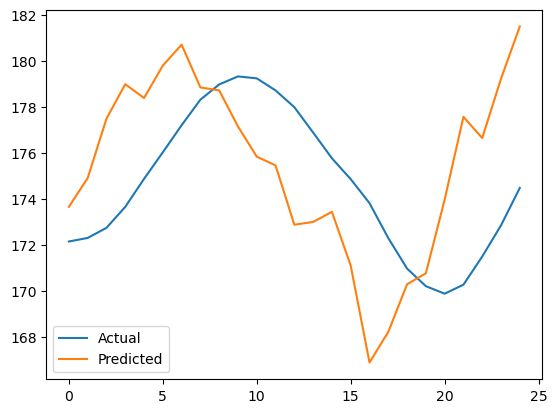

In [35]:
import matplotlib.pyplot as plt

plt.plot(y_pred, label='Actual')
plt.plot(y_real, label='Predicted')
plt.legend()
plt.show()

In [36]:
future_data = scaled_test[-16:]
future_data = future_data.reshape(1,16,1)
future_data

array([[[0.88251491],
        [0.87442957],
        [0.87208426],
        [0.85616041],
        [0.85690103],
        [0.85961673],
        [0.84517421],
        [0.81918992],
        [0.82739873],
        [0.84017478],
        [0.84313742],
        [0.8628879 ],
        [0.88510725],
        [0.8794289 ],
        [0.89535275],
        [0.90936328]]])

model.predict(future_data)

In [37]:
model.predict(future_data)

1/1 [==============================] - 2s 2s/step


array([[0.8775579]], dtype=float32)

In [58]:
from pyswarm import pso

In [69]:
train_length = train.size
val_percent = 0.80
train_length

1233

In [72]:
train_data = scaled_train[:ceil(train_length*val_percent)]
val_data = scaled_train[ceil(train_length*val_percent):]
train_generated = TimeseriesGenerator(train_data,train_data,length=16,batch_size=32)
val_generated = TimeseriesGenerator(val_data,val_data,length=16,batch_size=32)

In [73]:
model2 = Sequential()
sequence_length = 16  # This should match the length you used for TimeseriesGenerator
input_shape = (sequence_length, 1)  # Input shape with sequence length and feature dimension

model2.add(LSTM(64, activation='tanh', input_shape=input_shape, return_sequences=True))
model2.add(LSTM(32, activation='tanh', return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(16, activation='tanh'))
model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [74]:
history = history = model2.fit(train_generated, validation_data=val_generated, epochs=50, batch_size=32, verbose=0)
val_loss = history.history['val_loss'][-1]

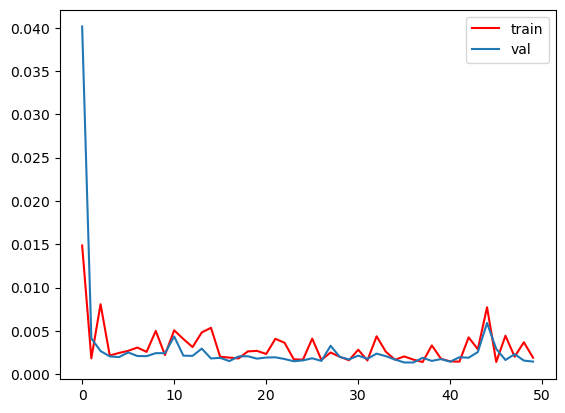

In [79]:
plt.plot(history.history['val_loss'],color='red',label='train')
plt.plot(history.history['loss'],label='val')
plt.legend()

In [80]:
val_loss

0.001895787427201867

In [81]:
def objective_function(hyperparameters):
    learning_rate, num_units, dropout_rate = hyperparameters
    
    train_generated = TimeseriesGenerator(train_data,train_data,length=16,batch_size=32)
    val_generated = TimeseriesGenerator(val_data,val_data,length=16,batch_size=32)

    model2 = Sequential()
    sequence_length = 16  # This should match the length you used for TimeseriesGenerator
    input_shape = (sequence_length, 1)  # Input shape with sequence length and feature dimension

    model2.add(LSTM(64, activation='tanh', input_shape=input_shape, return_sequences=True))
    model2.add(LSTM(32, activation='tanh', return_sequences=True))
    model2.add(Dropout(0.2))
    model2.add(LSTM(16, activation='tanh'))
    model2.add(Dense(1))

    model2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

    # Train the model and return a validation loss
    history = history = model2.fit(train_generated, validation_data=val_generated, epochs=50, batch_size=32, verbose=0)
    val_loss = history.history['val_loss'][-1]
    return val_loss

In [87]:
lb = [0.01, 16, 0.1]  # Lower bounds for learning rate, num_units, and dropout rate
ub = [0.02, 32, 0.3]   # Upper bounds for learning rate, num_units, and dropout rate

# Perform PSO optimization
#best_hyperparameters, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=20)
#print("Best hyperparameters:", best_hyperparameters)

In [ ]:
y_pred = model.predict(test_data)

In [ ]:
pso(objective_function, lb, ub, swarmsize=10, maxiter=1)